In [1]:
!pip install SimpleITK
!pip install pydicom

#Limpia los registros generados
from IPython.display import clear_output

clear_output()

In [2]:
# Librerias 
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
import os
import pydicom
import numpy as np
import pandas as pd
import os
import glob
import pickle 

from tqdm import tqdm
from sklearn.model_selection import train_test_split

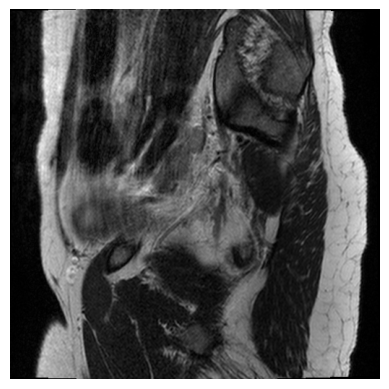

In [4]:
# Leer la carpeta con varios DICOM
image = sitk.ReadImage("/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/TCGA-VS-A8EB/05-05-2004-NA-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/401.000000-SAG T2-12004/1-01.dcm")

# Convertir a array
array = sitk.GetArrayFromImage(image)  # [slices, rows, cols]

# Mostrar un corte intermedio
plt.imshow(array[array.shape[0]//2], cmap='gray')
plt.axis('off')
plt.show()


In [7]:
clinical_data= pd.read_csv("../data/cesc_tcga_gdc_clinical_data.tsv", sep="\t")

In [8]:
# Ruta de la carpeta
ruta = "/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/"

# Lista de nombres de archivos y carpetas
nombres = [i for i in os.listdir(ruta) if '.' not in i]
print(nombres)


['TCGA-VS-A8Q9', 'TCGA-VS-A8QA', 'TCGA-VS-A8QC', 'TCGA-VS-A8QF', 'TCGA-VS-A8QH', 'TCGA-VS-A8QM', 'TCGA-VS-A94W', 'TCGA-VS-A94X', 'TCGA-VS-A94Y', 'TCGA-VS-A94Z', 'TCGA-VS-A950', 'TCGA-VS-A952', 'TCGA-VS-A953', 'TCGA-VS-A954', 'TCGA-VS-A957', 'TCGA-VS-A958', 'TCGA-VS-A959', 'LICENSE', 'TCGA-VS-A8EB', 'TCGA-VS-A8EC', 'TCGA-VS-A8EG', 'TCGA-VS-A8EH', 'TCGA-VS-A8EI', 'TCGA-VS-A8EJ', 'TCGA-VS-A8EK', 'TCGA-VS-A8EL', 'TCGA-VS-A8Q8', 'TCGA-VS-A9U5', 'TCGA-VS-A9U6', 'TCGA-VS-A9U7', 'TCGA-VS-A9UA', 'TCGA-VS-A9UB', 'TCGA-VS-A9UC', 'TCGA-VS-A9UD', 'TCGA-VS-A9UH', 'TCGA-VS-A9UI', 'TCGA-VS-A9UJ', 'TCGA-VS-A9UL', 'TCGA-VS-A9UM', 'TCGA-VS-A9UO', 'TCGA-VS-A9UP', 'TCGA-VS-A9UQ', 'TCGA-VS-A9UR', 'TCGA-VS-A9UT', 'TCGA-VS-A9UU', 'TCGA-VS-A9UV', 'TCGA-VS-A9UY', 'TCGA-VS-A9UZ', 'TCGA-VS-A9V0', 'TCGA-VS-A9V1', 'TCGA-VS-A9V2', 'TCGA-VS-A9V3', 'TCGA-VS-A9V4', 'TCGA-VS-A9V5', 'TCGA-VS-AA62']


In [9]:
df_filtrado = clinical_data[clinical_data["Patient ID"].isin(nombres)]
df_filtrado.shape


(54, 43)

In [10]:
df_filtrado.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                42
Mucinous Adenocarcinoma of Endocervical Type    12
Name: count, dtype: int64

In [11]:
images = glob.glob(f'{ruta}/**/*.dcm', recursive=True)
images = pd.DataFrame(images, columns=['path'])
images['Patient ID'] = [i.split('/')[-4] for i in images.path]

In [12]:
images

,path,Patient ID
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
...,...,...
19130,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19131,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19132,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19133,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62


In [13]:
#Data Split
X_train, X_test = train_test_split(df_filtrado[['Patient ID', 'Disease Type']], test_size=0.3, random_state=0, stratify=df_filtrado['Disease Type'])
X_val, X_test = train_test_split(X_test, test_size=0.5, random_state=0, stratify=X_test['Disease Type'])

In [14]:
X_train = pd.merge(images, X_train, on='Patient ID')
X_val = pd.merge(images, X_val, on='Patient ID')
X_test = pd.merge(images, X_test, on='Patient ID')

In [15]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 3)
Validation shape: (3273, 3)
Test shape: (2227, 3)


In [16]:
X_train.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                8517
Mucinous Adenocarcinoma of Endocervical Type    5118
Name: count, dtype: int64

In [17]:
X_val.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                2552
Mucinous Adenocarcinoma of Endocervical Type     721
Name: count, dtype: int64

In [18]:
X_test.value_counts('Disease Type')

Disease Type
Cervical Squamous Cell Carcinoma                1824
Mucinous Adenocarcinoma of Endocervical Type     403
Name: count, dtype: int64

In [19]:
# Training data 

X_train = X_train.reset_index(drop=True)
X_train['image'] = None
for ix,i in tqdm(enumerate(X_train.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_train.loc[ix, 'image'] = image

13635it [07:24, 30.67it/s]


In [20]:
X_val = X_val.reset_index(drop=True)
X_val['image'] = None
for ix,i in tqdm(enumerate(X_val.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    X_val.loc[ix, 'image'] = image

3273it [01:36, 33.99it/s]


In [21]:
X_test = X_test.reset_index(drop=True)
X_test['image'] = None
for ix,i in tqdm(enumerate(X_test.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_test.loc[ix, 'image'] = image

2227it [01:11, 30.94it/s]


### One-hot-encoding for target variable

In [24]:
#One-hot-encoding target variable
mapping = {'Cervical Squamous Cell Carcinoma':0, 'Mucinous Adenocarcinoma of Endocervical Type':1}
X_train['Target'] = X_train['Disease Type'].map(mapping)
X_val['Target'] = X_val['Disease Type'].map(mapping)
X_test['Target'] = X_test['Disease Type'].map(mapping)

In [25]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 5)
Validation shape: (3273, 5)
Test shape: (2227, 5)


In [30]:
X_train.head(15)

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
5,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
6,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
7,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
8,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
9,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


### Shuffle dataframe with fixed seed

In [32]:
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
X_val = X_val.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)

In [33]:
X_train.head(15)

,path,Patient ID,Disease Type,image,Target
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UT,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UP,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EJ,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9V2,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UR,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
5,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62,Cervical Squamous Cell Carcinoma,"[[[0, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 5...",0
6,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8EI,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",0
7,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UO,Mucinous Adenocarcinoma of Endocervical Type,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A954,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 96, 94, 94, 93, 86, 73...",0
9,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A9UM,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0


In [34]:
pickle.dump(X_train, open('../data/X_train_raw.pk', 'wb'))
pickle.dump(X_val, open('../data/X_val_raw.pk', 'wb'))
pickle.dump(X_test, open('../data/X_test_raw.pk', 'wb'))

In [35]:
!ls ./data/*.pk -lstgha

ls: cannot access './data/*.pk': No such file or directory


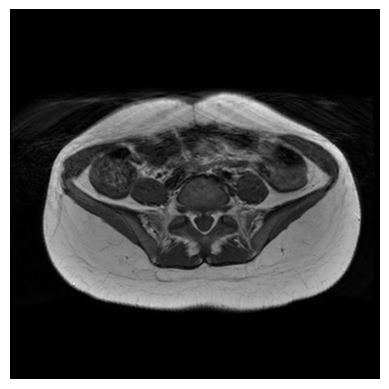

In [38]:
plt.imshow(X_train.loc[50].image[0], cmap='gray')
plt.axis('off')
plt.show()